In [89]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [90]:
movie_df = pd.read_csv('imdb_top_1000.csv')
movie_df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [91]:
movie_df[['Runtime', 'drop']] = movie_df['Runtime'].str.split(' ', 1, expand=True)

C:\Users\Cole\AppData\Local\Temp\ipykernel_11624\71260551.py:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  movie_df[['Runtime', 'drop']] = movie_df['Runtime'].str.split(' ', 1, expand=True)


In [92]:
movie_df.drop(columns=['Poster_Link', 'Overview', 'Star1', 'Star2', 'Star3', 'Star4', 'Meta_score', 'Gross', 'Certificate', 'drop'], inplace=True)

In [93]:
le = LabelEncoder()
le.fit(movie_df.Director.unique())
movie_df['Director'] = le.transform(movie_df.Director)

In [94]:
movie_df['Released_Year'].replace({'PG': 1995}, inplace=True)

In [95]:
movie_df['Released_Year'] = movie_df['Released_Year'].apply(int)
movie_df['Runtime'] = movie_df['Runtime'].apply(int)

In [96]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   1000 non-null   object 
 1   Released_Year  1000 non-null   int64  
 2   Runtime        1000 non-null   int64  
 3   Genre          1000 non-null   object 
 4   IMDB_Rating    1000 non-null   float64
 5   Director       1000 non-null   int32  
 6   No_of_Votes    1000 non-null   int64  
dtypes: float64(1), int32(1), int64(3), object(2)
memory usage: 50.9+ KB


In [97]:
movie_df

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Director,No_of_Votes
0,The Shawshank Redemption,1994,142,Drama,9.3,141,2343110
1,The Godfather,1972,175,"Crime, Drama",9.2,137,1620367
2,The Dark Knight,2008,152,"Action, Crime, Drama",9.0,83,2303232
3,The Godfather: Part II,1974,202,"Crime, Drama",9.0,137,1129952
4,12 Angry Men,1957,96,"Crime, Drama",9.0,456,689845
...,...,...,...,...,...,...,...
995,Breakfast at Tiffany's,1961,115,"Comedy, Drama, Romance",7.6,50,166544
996,Giant,1956,201,"Drama, Western",7.6,164,34075
997,From Here to Eternity,1953,118,"Drama, Romance, War",7.6,145,43374
998,Lifeboat,1944,97,"Drama, War",7.6,22,26471


In [98]:
allmovielist = movie_df['Series_Title'].to_list()

In [99]:
test = movie_df[movie_df['Genre'].apply(lambda x: pd.Series(x.split(', ')).isin(['Drama']).any())]

In [100]:
test

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Director,No_of_Votes
0,The Shawshank Redemption,1994,142,Drama,9.3,141,2343110
1,The Godfather,1972,175,"Crime, Drama",9.2,137,1620367
2,The Dark Knight,2008,152,"Action, Crime, Drama",9.0,83,2303232
3,The Godfather: Part II,1974,202,"Crime, Drama",9.0,137,1129952
4,12 Angry Men,1957,96,"Crime, Drama",9.0,456,689845
...,...,...,...,...,...,...,...
993,Blowup,1966,111,"Drama, Mystery, Thriller",7.6,336,56513
995,Breakfast at Tiffany's,1961,115,"Comedy, Drama, Romance",7.6,50,166544
996,Giant,1956,201,"Drama, Western",7.6,164,34075
997,From Here to Eternity,1953,118,"Drama, Romance, War",7.6,145,43374


In [101]:
dramamovielist = test['Series_Title'].to_list()

In [102]:
outcome = []
for movie in allmovielist:
    if movie in dramamovielist:
        outcome.append(1)
    else:
        outcome.append(0)

In [103]:
drama_df = movie_df
drama_df['Outcome'] = outcome

In [104]:
drama_df

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Director,No_of_Votes,Outcome
0,The Shawshank Redemption,1994,142,Drama,9.3,141,2343110,1
1,The Godfather,1972,175,"Crime, Drama",9.2,137,1620367,1
2,The Dark Knight,2008,152,"Action, Crime, Drama",9.0,83,2303232,1
3,The Godfather: Part II,1974,202,"Crime, Drama",9.0,137,1129952,1
4,12 Angry Men,1957,96,"Crime, Drama",9.0,456,689845,1
...,...,...,...,...,...,...,...,...
995,Breakfast at Tiffany's,1961,115,"Comedy, Drama, Romance",7.6,50,166544,1
996,Giant,1956,201,"Drama, Western",7.6,164,34075,1
997,From Here to Eternity,1953,118,"Drama, Romance, War",7.6,145,43374,1
998,Lifeboat,1944,97,"Drama, War",7.6,22,26471,1


In [105]:
drama_df.set_index('Series_Title', inplace=True)

In [106]:
X = drama_df.drop(columns=['Outcome', 'Genre']) 
y = drama_df.Outcome

In [107]:
X.head()

,Released_Year,Runtime,IMDB_Rating,Director,No_of_Votes
Series_Title,,,,,
The Shawshank Redemption,1994,142,9.3,141,2343110
The Godfather,1972,175,9.2,137,1620367
The Dark Knight,2008,152,9.0,83,2303232
The Godfather: Part II,1974,202,9.0,137,1129952
12 Angry Men,1957,96,9.0,456,689845


In [108]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [109]:
LogReg = LogisticRegression()

scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

LogReg.fit(X_train,y_train)

y_pred=LogReg.predict(X_test)

In [110]:
print('Classes', LogReg.classes_)
print('Intercept',LogReg.intercept_)
print("Coefficients", LogReg.coef_ )

Classes [0 1]
Intercept [1.12926775]
Coefficients [[ 0.46929858  0.59353817  0.56524343 -0.08354393 -0.85589352]]


In [111]:
print("Accuracy", LogReg.score(X_test, y_test))
print(classification_report(y_test, LogReg.predict(X_test)))

Accuracy 0.776
              precision    recall  f1-score   support

           0       0.67      0.28      0.39        65
           1       0.79      0.95      0.86       185

    accuracy                           0.78       250
   macro avg       0.73      0.61      0.63       250
weighted avg       0.76      0.78      0.74       250



In [112]:
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[ 18,  47],
       [  9, 176]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted label')

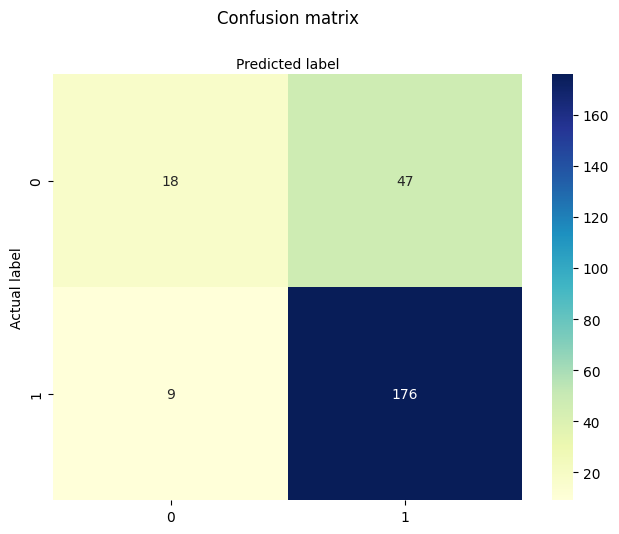

In [113]:
categories = [0,1] 
fig, ax = plt.subplots()
plt.xticks([0,1], categories)
plt.yticks([0,1], categories)
sns.heatmap(pd.DataFrame(conf_mat), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [114]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent")

In [115]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

Accuracy: 0.776
Precision: 0.7892376681614349
Recall: 0.9513513513513514


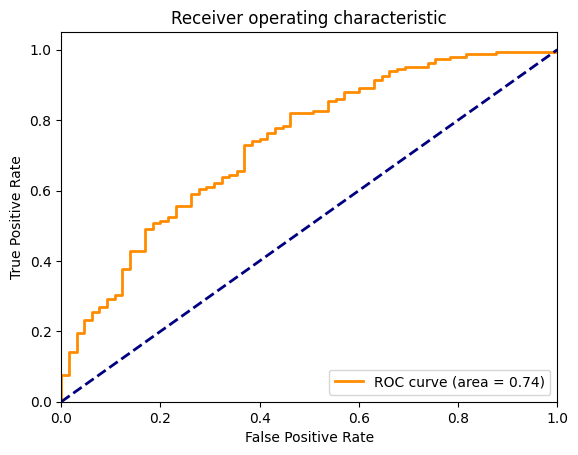

In [116]:
y_pred_proba = LogReg.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
        lw=2, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
